In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# for train-test split
from sklearn.model_selection import train_test_split

# for decision tree 
from sklearn.tree import DecisionTreeClassifier

# To visulaize the tree we need below package
from IPython.display import Image # from a given structure draw an image if that supports
from six import StringIO # to output a graph into a file
from sklearn.tree import export_graphviz # from a decision tree plot a graph
import pydotplus, graphviz

# for evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df.head(5)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [6]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']

## Notes

- Heart disease = 0 means that the person does not have heart disease.
- Heart disease = 1 means that the person has heart disease.
 
- sex = 0 means that the person is female.
- sex = 1 means that the person is male.


### In this dataset no cleaning, imbalace techniques, data preparation or feature manipulation techniques are needed.

### Train - test split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape


((189, 4), (81, 4))

## Building the decision tree model

- Using all default parameters except depth(max_depth) to build a simple tree. We will check this part later.

In [9]:
# Object of DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [10]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

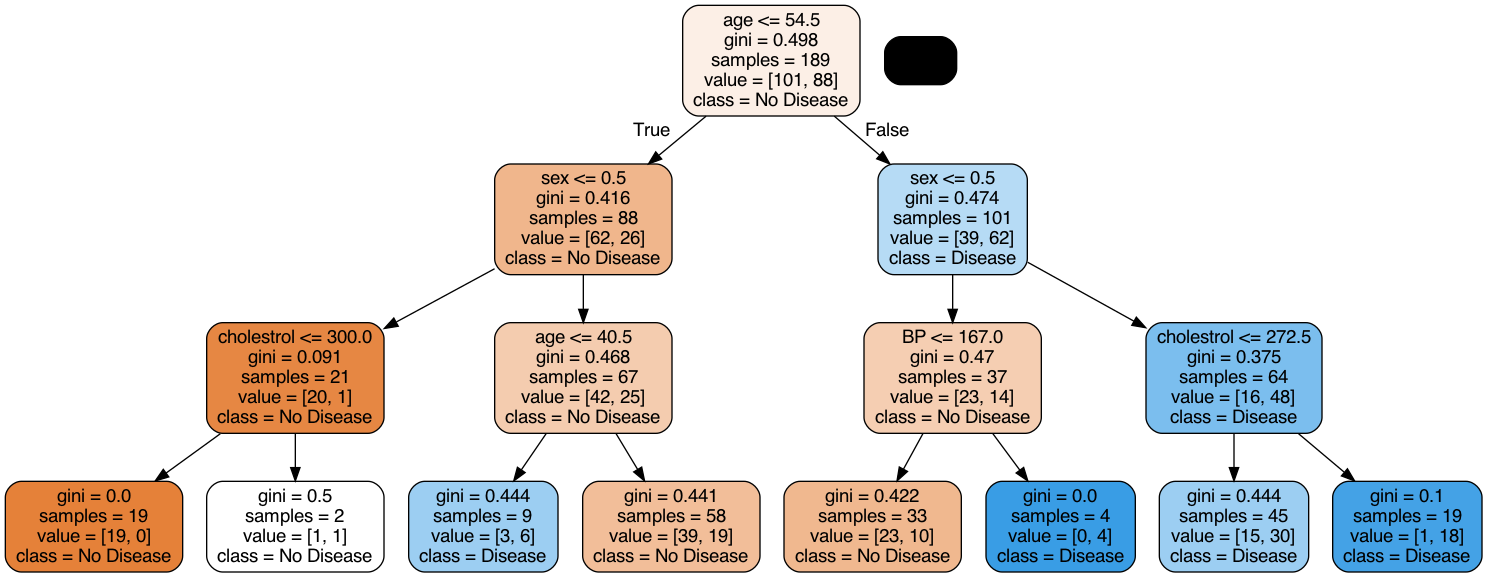

In [11]:
# plotting tree with max_depth=3
dot_data = StringIO()  

# with below step create a graphvoz object and put in dot_data
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

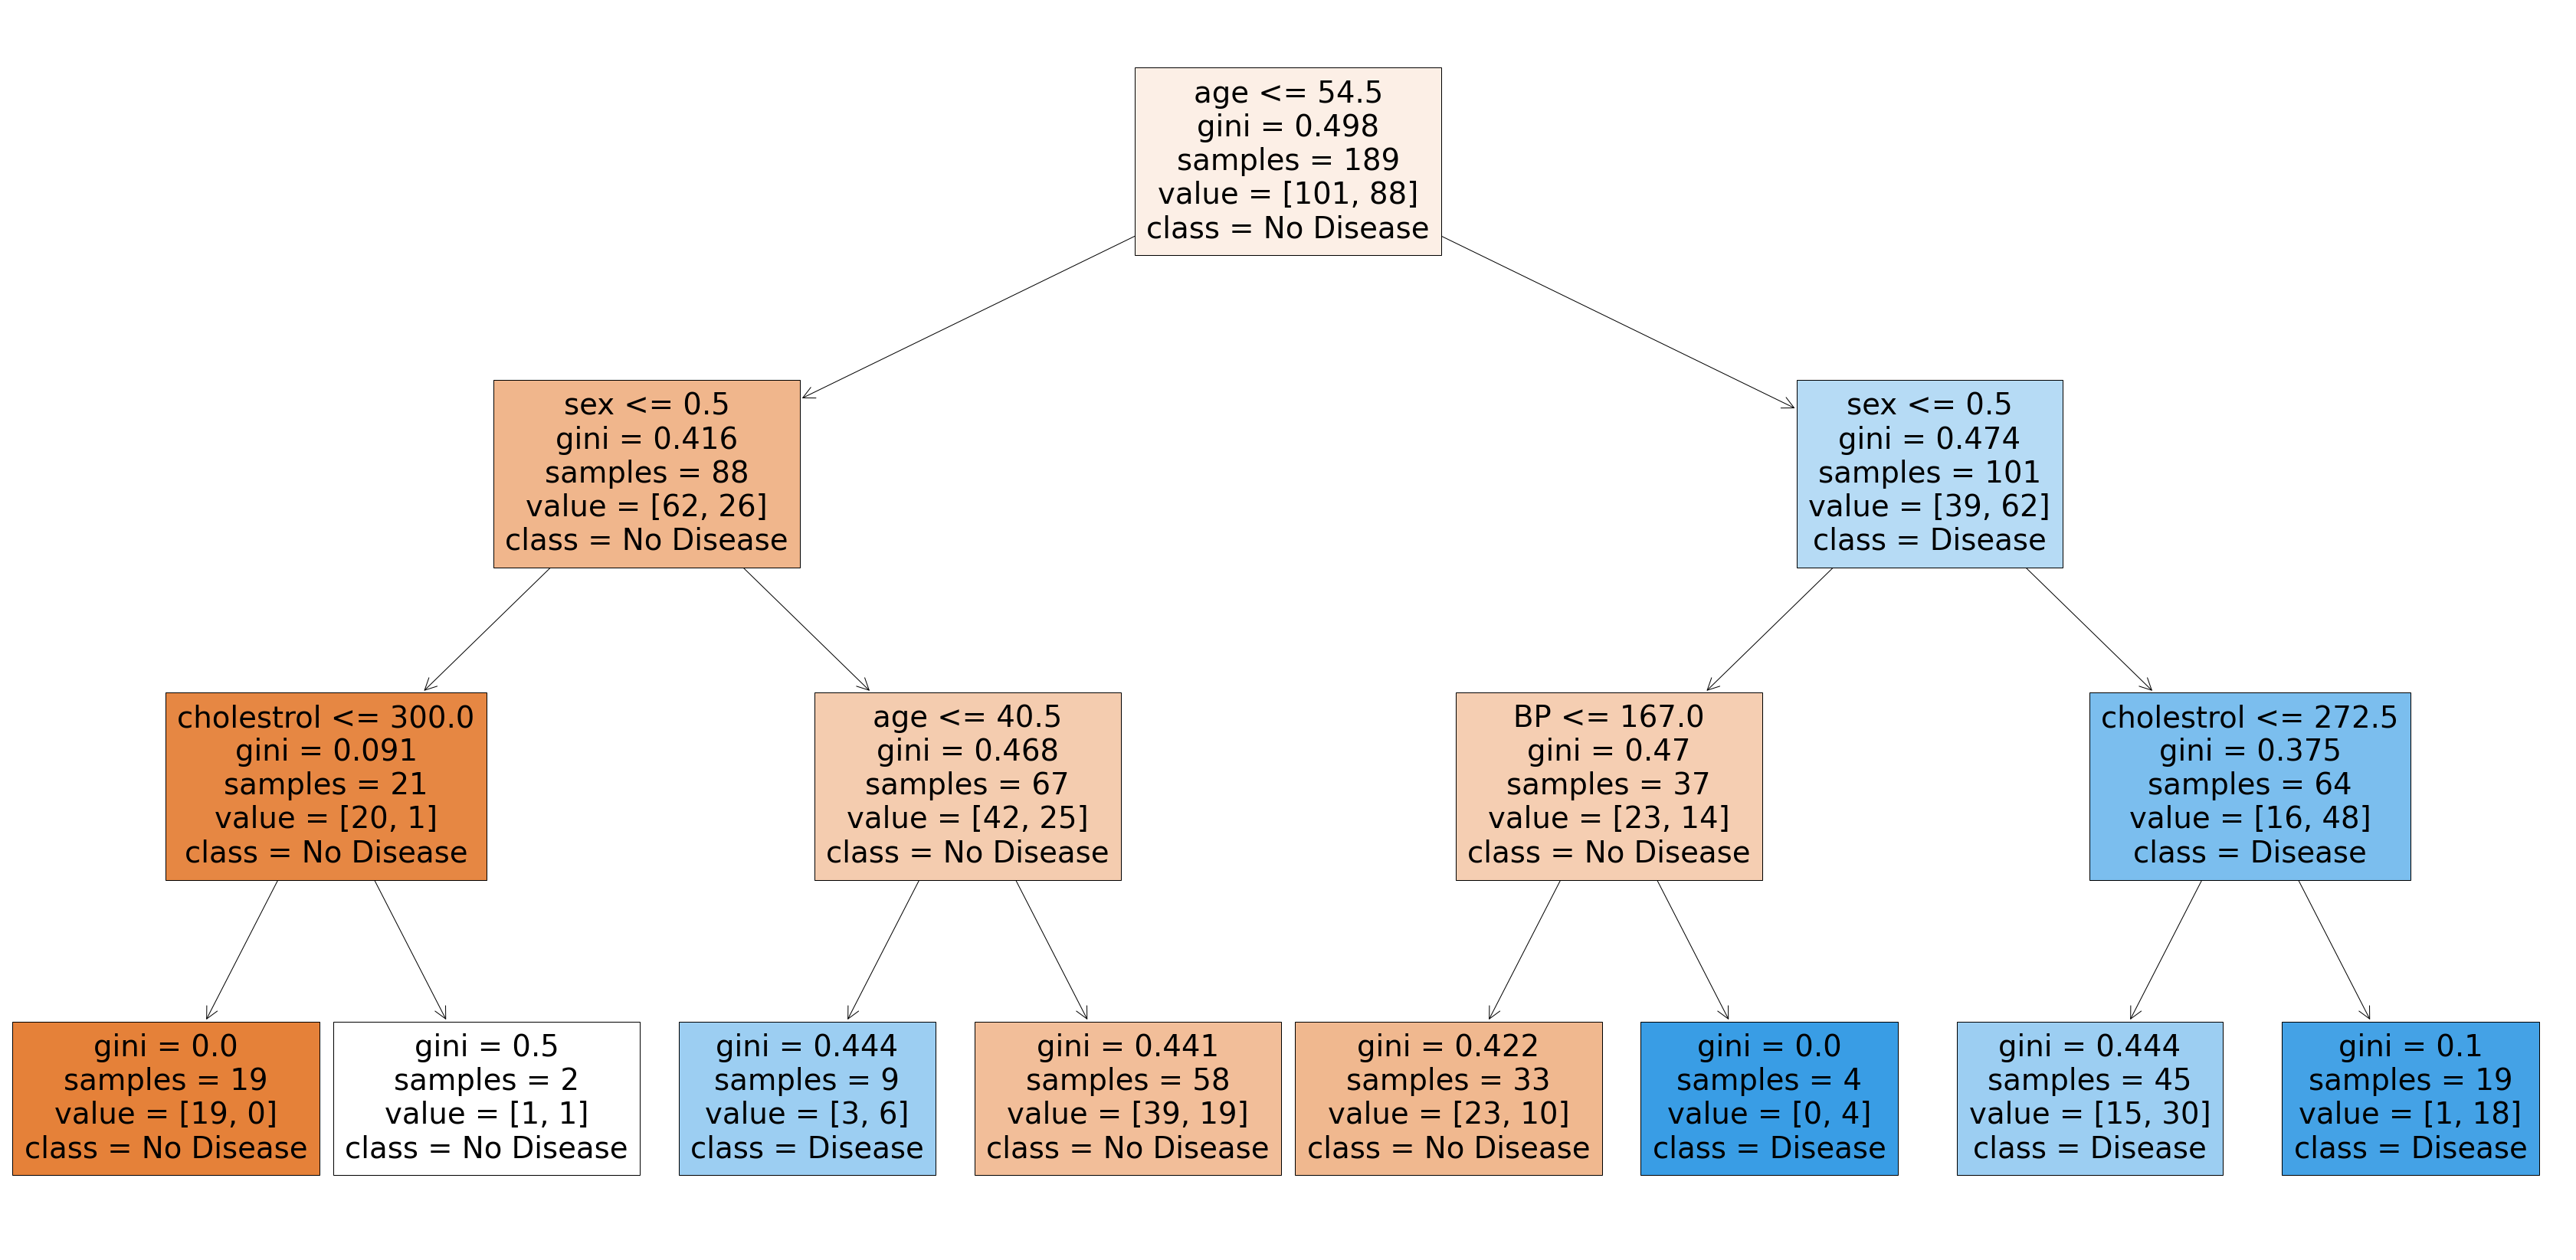

In [15]:
### Alternate way to plot
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

## Evaluating the models performance on test set

In [12]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [13]:
# on training data
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [14]:
# on testing data
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

### There is a big drop in accuracy from train to test.

- To deal with this we will change few hyperparameters and see if we get better results.